In [4]:
!pip install kagglehub


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip show kagglehub


Name: kagglehub
Version: 0.3.6
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kagglehub
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, are controlled by, or are under common
              control with that entity. For the purposes of this

In [7]:
import sys
print(sys.executable)


C:\Users\ADMIN\anaconda3\envs\tf-env\python.exe


In [8]:
import sys
!{sys.executable} -m pip install kagglehub


In [1]:
import kagglehub
print("✅ kagglehub imported successfully!")

✅ kagglehub imported successfully!


C:\Users\ADMIN\anaconda3\envs\tf-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.03G/1.03G [01:57<00:00, 9.40MB/s]

Extracting files...


Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\grassknoted\asl-alphabet\versions\1


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [1]:
dataset_dir = r"C:\Users\ADMIN\.cache\kagglehub\datasets\grassknoted\asl-alphabet\versions\1\asl_alphabet_train\asl_alphabet_train"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Number of classes detected:", train_generator.num_classes)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Number of classes detected: 29


### Build the CNN Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 128)        

### Compile and Train the Model

In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
2175/2175 [==============================] - 1533s 703ms/step - loss: 1.2277 - accuracy: 0.6117 - val_loss: 0.8937 - val_accuracy: 0.7269
Epoch 2/10
2175/2175 [==============================] - 311s 143ms/step - loss: 0.3101 - accuracy: 0.8904 - val_loss: 0.7646 - val_accuracy: 0.8021
Epoch 3/10
2175/2175 [==============================] - 230s 106ms/step - loss: 0.1757 - accuracy: 0.9379 - val_loss: 0.8304 - val_accuracy: 0.7966
Epoch 4/10
2175/2175 [==============================] - 225s 103ms/step - loss: 0.1227 - accuracy: 0.9580 - val_loss: 0.7453 - val_accuracy: 0.8123
Epoch 5/10
2175/2175 [==============================] - 225s 104ms/step - loss: 0.0927 - accuracy: 0.9686 - val_loss: 0.9063 - val_accuracy: 0.8072
Epoch 6/10
2175/2175 [==============================] - 263s 121ms/step - loss: 0.0795 - accuracy: 0.9740 - val_loss: 0.8308 - val_accuracy: 0.8197
Epoch 7/10
2175/2175 [==============================] - 256s 118ms/step - loss: 0.0643 - accuracy: 0.9781 - val

1/1 [==============================] - 1s 743ms/step
Predicted Gesture: A


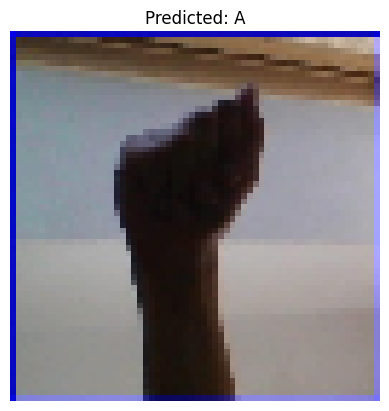

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to any single image, e.g. from class "A"
img_path = r"C:\Users\ADMIN\.cache\kagglehub\datasets\grassknoted\asl-alphabet\versions\1\asl_alphabet_train\asl_alphabet_train\A\A1.jpg"

# Load and preprocess image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Get class labels
labels = list(train_generator.class_indices.keys())

print("Predicted Gesture:", labels[predicted_class])

# Show image
plt.imshow(img)
plt.title(f"Predicted: {labels[predicted_class]}")
plt.axis('off')
plt.show()


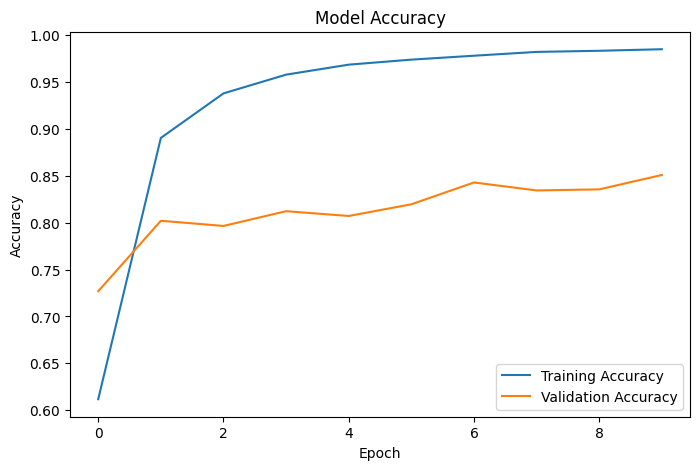

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Reduce Dropout from 0.5 → 0.3
→ Keeps more learning capacity while still preventing overfitting.

#### Increase Dense units from 128 → 256
→ Gives the model a bit more power to learn complex gestures.

#### Train longer (15–20 epochs instead of 10)
→ More epochs = more stable accuracy improvement.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),     # ⬅️ Increased neurons
    Dropout(0.3),                      # ⬅️ Reduced dropout
    Dense(train_generator.num_classes, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)        

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20                        # ⬅️ Train for 20 epochs
)


Epoch 1/20


2175/2175 [==============================] - 1278s 586ms/step - loss: 0.6773 - accuracy: 0.7932 - val_loss: 1.1270 - val_accuracy: 0.7380
Epoch 2/20
2175/2175 [==============================] - 273s 125ms/step - loss: 0.0845 - accuracy: 0.9726 - val_loss: 1.2284 - val_accuracy: 0.7505
Epoch 3/20
2175/2175 [==============================] - 273s 125ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 1.2018 - val_accuracy: 0.7606
Epoch 4/20
2175/2175 [==============================] - 301s 138ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 1.2796 - val_accuracy: 0.7833
Epoch 6/20
2175/2175 [==============================] - 296s 136ms/step - loss: 0.0263 - accuracy: 0.9925 - val_loss: 1.4220 - val_accuracy: 0.7503
Epoch 7/20
2175/2175 [==============================] - 354s 163ms/step - loss: 0.0257 - accuracy: 0.9925 - val_loss: 1.3593 - val_accuracy: 0.7821
Epoch 8/20
2175/2175 [==============================] - 354s 163ms/step - loss: 0.0214 - accuracy: 0.9942 - 

### training accuracy (99.6%) and validation accuracy (79%) show that it’s learning but is overfitting — i.e., performing better on training data than unseen data.

#### Tune the model with change in image 

#### Retraining the model with image Augmentation
#### changes like rotation, zoom, brightness, etc., can make your model more robust.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

##### Create the Train and Validation Generators

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   # 👈 this creates a 20% validation split
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator (from the same folder)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


#### Retrain the Model with Augmented Data

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/20
2175/2175 [==============================] - 706s 323ms/step - loss: 2.4344 - accuracy: 0.2621 - val_loss: 3.4036 - val_accuracy: 0.2191
Epoch 2/20
2175/2175 [==============================] - 3227s 1s/step - loss: 1.3498 - accuracy: 0.5442 - val_loss: 1.7870 - val_accuracy: 0.5210
Epoch 3/20
2175/2175 [==============================] - 623s 286ms/step - loss: 0.7973 - accuracy: 0.7235 - val_loss: 0.9787 - val_accuracy: 0.7118
Epoch 4/20
2175/2175 [==============================] - 3158s 1s/step - loss: 0.5643 - accuracy: 0.8072 - val_loss: 0.8217 - val_accuracy: 0.7528
Epoch 5/20
2175/2175 [==============================] - 652s 300ms/step - loss: 0.4253 - accuracy: 0.8559 - val_loss: 0.8753 - val_accuracy: 0.7657
Epoch 6/20
2175/2175 [==============================] - 625s 287ms/step - loss: 0.3486 - accuracy: 0.8828 - val_loss: 0.8317 - val_accuracy: 0.7636
Epoch 7/20
2175/2175 [==============================] - 595s 273ms/step - loss: 0.2970 - accuracy: 0.9013 - val_loss